<a href="https://colab.research.google.com/github/Ddasunsandeepa/DeepLearning-with-Tensorflow/blob/main/Image_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
import numpy as np

In [2]:
(x_train,y_train) , (x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
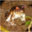

In [4]:
x_train[0]

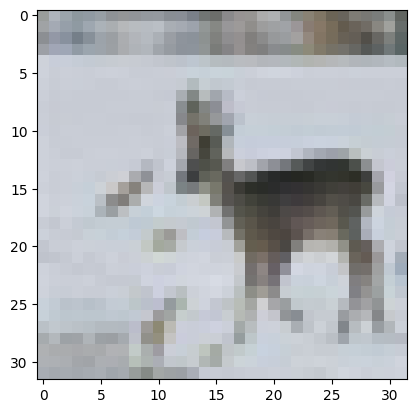

In [5]:
plt.imshow(x_train[20])

In [6]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1)
y_train


array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [9]:
def plot_samples(x,y,index) :
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])


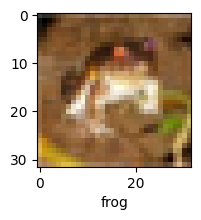

In [10]:
plot_samples(x_train,y_train,0)

In [11]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation ='sigmoid')
])

ann.compile(optimizer='SGD',
loss='sparse_categorical_crossentropy',
metrics = ['accuracy'])

ann.fit(x_train, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 80ms/step - accuracy: 0.1022 - loss: nan
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 79ms/step - accuracy: 0.0976 - loss: nan
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.0980 - loss: nan
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.1001 - loss: nan
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 79ms/step - accuracy: 0.0996 - loss: nan


In [18]:
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(3000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=5)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 81ms/step - accuracy: 0.4219 - loss: 1.5921
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.6401 - loss: 1.0238
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.7184 - loss: 0.8095
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 80ms/step - accuracy: 0.7832 - loss: 0.6239
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 84ms/step - accuracy: 0.8481 - loss: 0.4365


In [19]:
cnn.evaluate(x_test , y_test )

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.7145 - loss: 0.9011


[0.9042900204658508, 0.7146999835968018]

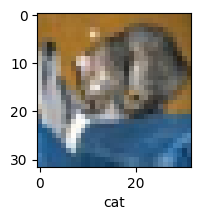

In [21]:
plot_samples(x_test,y_test,0)

In [28]:
pred = cnn.predict(x_test)
pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


array([[6.8057772e-05, 2.9890254e-05, 1.9655569e-04, 9.9646640e-01,
        5.5105875e-07, 1.7353275e-03, 3.3746593e-04, 3.8233587e-08,
        1.1652110e-03, 5.2265125e-07],
       [2.3913693e-04, 9.0078013e-03, 4.6640512e-06, 6.3085892e-08,
        7.4588238e-09, 1.7105787e-08, 3.0113405e-08, 9.1044977e-10,
        9.9060214e-01, 1.4620573e-04],
       [2.3413491e-02, 3.1021697e-02, 3.1678986e-03, 9.1254571e-04,
        3.6109530e-03, 1.0114682e-03, 1.2927614e-03, 4.3044036e-04,
        8.2895362e-01, 1.0618516e-01],
       [1.7446758e-01, 1.4910512e-03, 8.7490439e-04, 5.2627451e-03,
        6.1132747e-01, 8.9088026e-05, 9.9055018e-05, 5.4502114e-05,
        2.0613465e-01, 1.9895210e-04],
       [1.8588528e-08, 1.9377387e-06, 1.0478750e-02, 5.5131996e-03,
        9.5179909e-01, 1.4240122e-04, 3.2062873e-02, 9.7793566e-07,
        7.2310979e-07, 4.3465231e-08]], dtype=float32)

In [29]:
y_classes = [np.argmax(elements) for elements in pred]
y_classes[:6]

[np.int64(3), np.int64(8), np.int64(8), np.int64(4), np.int64(4), np.int64(6)]

In [32]:
y_test[:6]

array([3, 8, 8, 0, 6, 6], dtype=uint8)